In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

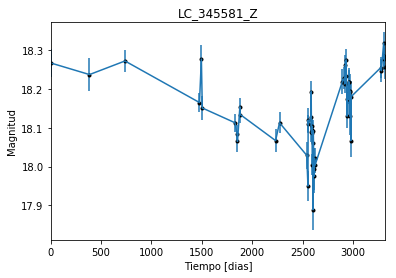

In [2]:
data = np.genfromtxt('LC_345581_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_345581_Z')
plt.savefig("LC_345581_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

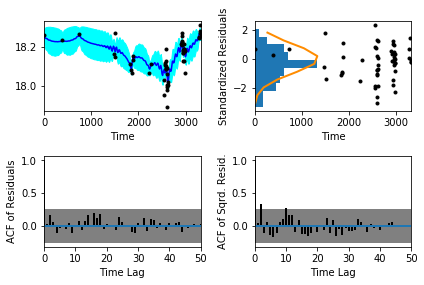

In [5]:
sample.assess_fit()

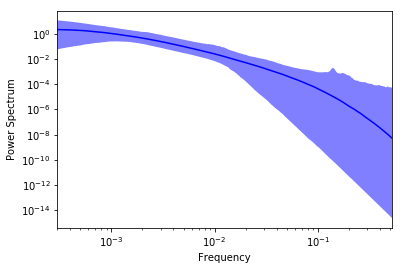

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

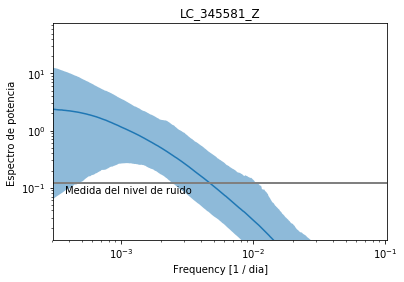

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_345581_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_345581_Z')

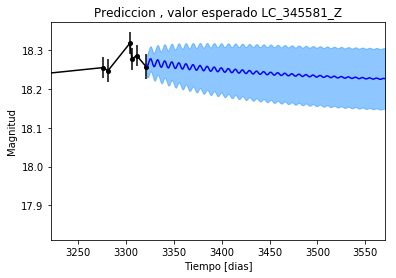

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_345581_Z')

Text(0.5,1,'Prediccion, Caminos simulados_LC_345581_Z')

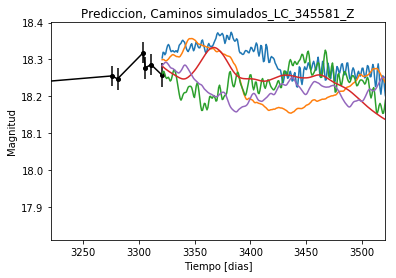

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_345581_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


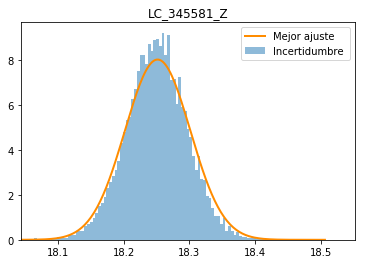

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_345581_Z')
plt.savefig("Mejor_ajuste_LC_345581_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_345581_Z')

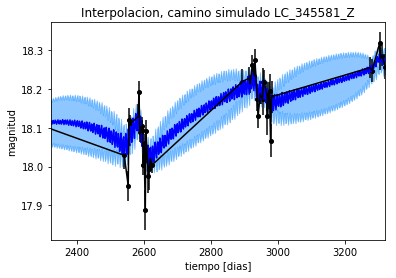

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_345581_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_345581_Z')

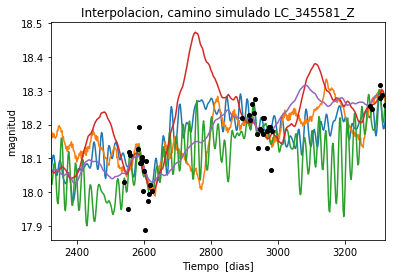

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_345581_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 747.766689357
Median: 0.0156475110207
Standard deviation: 0.200843530075
68% credibility interval: [ 0.00178923  0.19354714]
95% credibility interval: [  4.84557144e-04   7.97741014e-01]
99% credibility interval: [  3.59611564e-04   9.86166206e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 509.081251182
Median: 0.00601888123089
Standard deviation: 0.119275922362
68% credibility interval: [ 0.00087397  0.06292683]
95% credibility interval: [  3.70849311e-04   4.04042839e-01]
99% credibility interval: [  3.16185515e-04   8.75961467e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 756.108479186
Median: 0.0973962409676


In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 339.303544952
Median: 101.685505133
Standard deviation: 1.70323025064
68% credibility interval: [  99.96816263  102.90555332]
95% credibility interval: [  97.46856196  104.15081433]
99% credibility interval: [  95.53307266  106.14293559]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 632.422781386
Median: 1.39440260009
Standard deviation: 2.52898823103
68% credibility interval: [ 0.22813601  4.70434706]
95% credibility interval: [ 0.04520908  9.13347247]
99% credibility interval: [  0.01423619  12.46297335]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 349.172235478
Median: 1.78414507666
Standard deviation: 12.6421097216
68% credibility interval: [  0.09597565  18.41074191]
95% credibility interval: [  6.48045802e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 5821.93883014
Median: 9.86809044971e-29
Standard deviation: 6.2077843717e+126
68% credibility interval: [  1.40948831e-90   1.16305109e+01]
95% credibility interval: [  1.57453196e-125   1.16498097e+077]
99% credibility interval: [  3.92166277e-132   8.68448714e+121]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2335.88876748
Median: 18.1792428087
Standard deviation: 0.0400167873546
68% credibility interval: [ 18.14706031  18.21798453]
95% credibility interval: [ 18.10797453  18.27034674]
99% credibility interval: [ 18.07767408  18.30992162]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 532.827105859
Median: 0.0887225975633
Standard deviation: 0.296474622614
68% credibility interval: [ 0.          0.60307439]
95% credibility interval: [ 0.          0.93918383]
99% credibility interval: [ 0.          1.02578768]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 532.827105859
Median: 0.0887225975633
Standard deviation: 0.296474622614
68% credibility interval: [ 0.          0.60307439]
95% credibility interval: [ 0.          0.93918383]
99% credibility interval: [ 0.          1.02578768]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1270.32349621
Median: 0.0
Standard deviation: 0.000711785960083
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 339.303544952
Median: 101.685505133
Standard deviation: 1.70323025064
68% credibility interval: [  99.96816263  102.90555332]
95% credibility interval: [  97.46856196  104.15081433]
99% credibility interval: [  95.53307266  106.14293559]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1312.50344888
Median: 0.00873210448539
Standard deviation: 0.00597829111792
68% credibility interval: [ 0.00556479  0.01451104]
95% credibility interval: [ 0.00369375  0.0264945 ]
99% credibility interval: [ 0.00287245  0.03811972]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 458.197393502
Median: 1.36569455573
Standard deviation: 0.234499476438
68% credibility interval: [ 1.14371256  1.62371178]
95% credibility interval: [ 0.94579844  1.86676837]
99% credibility interval: [ 0.89007737  1.96511844]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 307.623367042
Median: 0.00292475312458
Standard deviation: 0.272052787316
68% credibility interval: [  2.68943681e-06   1.01090668e-01]
95% credibility interval: [  7.86234645e-80   8.56299347e-01]
99% credibility interval: [  1.46925413e-125   1.80433530e+000]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 747.766689357
Median: (-0.0983162113391-0.758859117458j)
Standard deviation: 2.25000616196
68% credibility interval: [-1.21609256-0.67298441j -0.01124204-5.42283656j]
95% credibility interval: [ -5.01235462e+00+0.j         -3.04456233e-03-0.1124469j]
99% credibility interval: [ -6.19626501e+00+0.j          -2.25950610e-03-0.10146281j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 509.081251182
Median: (-0.0378177461156+3.44555806621j)
Standard deviation: 2.00790733033
68% credibility interval: [-0.39538092+0.46169001j -0.00549134+0.51046861j]
95% credibility interval: [ -2.53867603e+00+1.2643853j   -2.33011494e-03+3.58220951j]
99% credibility interval: [ -5.50382822e+00+4.96118834j  -1.98665218e-03+5.80893269j]
Poste